In [437]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

In [438]:
df = pd.read_csv('Titanic-Dataset.csv')

# preprocessing

In [439]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [440]:
df.drop(columns=['PassengerId'], inplace=True)

In [441]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [442]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [443]:
df["Age"] = df["Age"].fillna(df["Age"].median())
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])

In [444]:
df["HasCabin"] = df["Cabin"].notna().astype(int)
df.drop("Cabin", axis=1, inplace=True)

In [445]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  891 non-null    object 
 10  HasCabin  891 non-null    int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [446]:
df.duplicated().sum()

np.int64(0)

In [447]:
df.drop_duplicates(inplace=True)

In [448]:
df['Title'] = df['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)

In [449]:
df['Title'].value_counts()

,count
Title,
Mr,517
Miss,182
Mrs,125
Master,40
Dr,7
Rev,6
Col,2
Mlle,2
Major,2


In [450]:
title_counts = df['Title'].value_counts()

df['Title'] = df['Title'].apply(lambda x: x if title_counts[x] >= 10 else 'Other')

In [451]:
df['Title'].value_counts()

,count
Title,
Mr,517
Miss,182
Mrs,125
Master,40
Other,27


In [452]:
title_dummies = pd.get_dummies(df["Title"], prefix="Title")
df = pd.concat([df, title_dummies], axis=1)
df.drop("Title", axis=1, inplace=True)

In [453]:
df.drop('Name', axis=1, inplace=True)

In [454]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Survived      891 non-null    int64  
 1   Pclass        891 non-null    int64  
 2   Sex           891 non-null    object 
 3   Age           891 non-null    float64
 4   SibSp         891 non-null    int64  
 5   Parch         891 non-null    int64  
 6   Ticket        891 non-null    object 
 7   Fare          891 non-null    float64
 8   Embarked      891 non-null    object 
 9   HasCabin      891 non-null    int64  
 10  Title_Master  891 non-null    bool   
 11  Title_Miss    891 non-null    bool   
 12  Title_Mr      891 non-null    bool   
 13  Title_Mrs     891 non-null    bool   
 14  Title_Other   891 non-null    bool   
dtypes: bool(5), float64(2), int64(5), object(3)
memory usage: 74.1+ KB


In [455]:
df["Sex"] = df["Sex"].map({"male": 1, "female": 0}).astype(int)

In [456]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,HasCabin,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other
0,0,3,1,22.0,1,0,A/5 21171,7.2500,S,0,False,False,True,False,False
1,1,1,0,38.0,1,0,PC 17599,71.2833,C,1,False,False,False,True,False
2,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,S,0,False,True,False,False,False
3,1,1,0,35.0,1,0,113803,53.1000,S,1,False,False,False,True,False
4,0,3,1,35.0,0,0,373450,8.0500,S,0,False,False,True,False,False


In [457]:
df["FamilySize"] = df["SibSp"] + df["Parch"] + 1
df["IsAlone"] = (df["FamilySize"] == 1).astype(int)

  ### We can drop these 2 columns or we can let them


In [458]:
df.drop(["SibSp", "Parch"], axis=1, inplace=True)

In [459]:
df.head()

,Survived,Pclass,Sex,Age,Ticket,Fare,Embarked,HasCabin,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,FamilySize,IsAlone
0,0,3,1,22.0,A/5 21171,7.2500,S,0,False,False,True,False,False,2,0
1,1,1,0,38.0,PC 17599,71.2833,C,1,False,False,False,True,False,2,0
2,1,3,0,26.0,STON/O2. 3101282,7.9250,S,0,False,True,False,False,False,1,1
3,1,1,0,35.0,113803,53.1000,S,1,False,False,False,True,False,2,0
4,0,3,1,35.0,373450,8.0500,S,0,False,False,True,False,False,1,1


In [460]:
df["Ticket"].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [461]:
df.drop("Ticket", axis=1, inplace=True)

In [462]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,HasCabin,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,FamilySize,IsAlone
0,0,3,1,22.0,7.2500,S,0,False,False,True,False,False,2,0
1,1,1,0,38.0,71.2833,C,1,False,False,False,True,False,2,0
2,1,3,0,26.0,7.9250,S,0,False,True,False,False,False,1,1
3,1,1,0,35.0,53.1000,S,1,False,False,False,True,False,2,0
4,0,3,1,35.0,8.0500,S,0,False,False,True,False,False,1,1


In [463]:
df["Fare"].unique()

array([  7.25  ,  71.2833,   7.925 ,  53.1   ,   8.05  ,   8.4583,
        51.8625,  21.075 ,  11.1333,  30.0708,  16.7   ,  26.55  ,
        31.275 ,   7.8542,  16.    ,  29.125 ,  13.    ,  18.    ,
         7.225 ,  26.    ,   8.0292,  35.5   ,  31.3875, 263.    ,
         7.8792,   7.8958,  27.7208, 146.5208,   7.75  ,  10.5   ,
        82.1708,  52.    ,   7.2292,  11.2417,   9.475 ,  21.    ,
        41.5792,  15.5   ,  21.6792,  17.8   ,  39.6875,   7.8   ,
        76.7292,  61.9792,  27.75  ,  46.9   ,  80.    ,  83.475 ,
        27.9   ,  15.2458,   8.1583,   8.6625,  73.5   ,  14.4542,
        56.4958,   7.65  ,  29.    ,  12.475 ,   9.    ,   9.5   ,
         7.7875,  47.1   ,  15.85  ,  34.375 ,  61.175 ,  20.575 ,
        34.6542,  63.3583,  23.    ,  77.2875,   8.6542,   7.775 ,
        24.15  ,   9.825 ,  14.4583, 247.5208,   7.1417,  22.3583,
         6.975 ,   7.05  ,  14.5   ,  15.0458,  26.2833,   9.2167,
        79.2   ,   6.75  ,  11.5   ,  36.75  ,   7.7958,  12.5

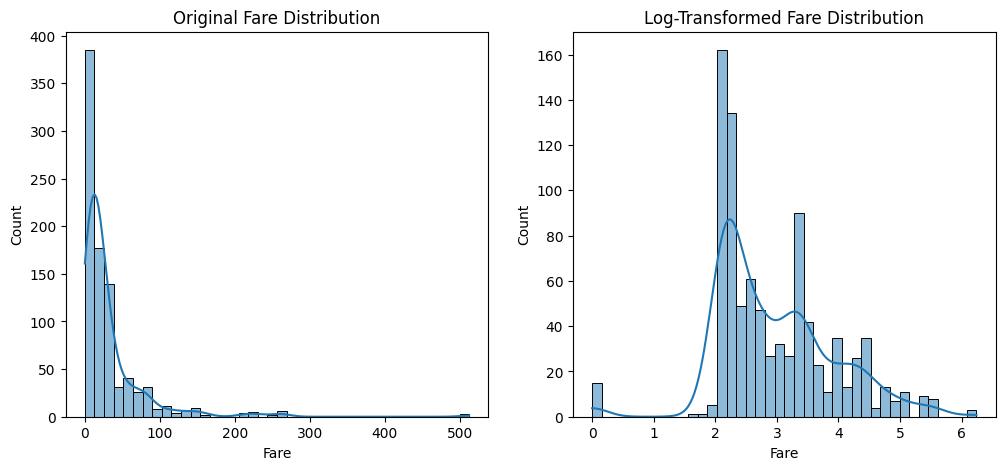

In [464]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(df["Fare"], bins=40, kde=True)
plt.title("Original Fare Distribution")

# Plot log-transformed Fare distribution
plt.subplot(1,2,2)
sns.histplot(np.log1p(df["Fare"]), bins=40, kde=True)
plt.title("Log-Transformed Fare Distribution")

plt.show()

In [465]:
print("Original Skewness:", df["Fare"].skew())
print("Log Skewness:", np.log1p(df["Fare"]).skew())
# if the number is closer to 0, it means the distribution is more symmetric.

Original Skewness: 4.787316519674893
Log Skewness: 0.3949280095189306


In [466]:
df["Fare"] = df["Fare"].replace(0, np.nan)
df["Fare"] = df["Fare"].fillna(df["Fare"].median())
df["Fare"] = np.log1p(df["Fare"])

In [467]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,HasCabin,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,FamilySize,IsAlone
0,0,3,1,22.0,2.110213,S,0,False,False,True,False,False,2,0
1,1,1,0,38.0,4.280593,C,1,False,False,False,True,False,2,0
2,1,3,0,26.0,2.188856,S,0,False,True,False,False,False,1,1
3,1,1,0,35.0,3.990834,S,1,False,False,False,True,False,2,0
4,0,3,1,35.0,2.202765,S,0,False,False,True,False,False,1,1


In [468]:
df = pd.get_dummies(df, columns=["Embarked"], drop_first=True)

In [469]:
df.head()

,Survived,Pclass,Sex,Age,Fare,HasCabin,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,FamilySize,IsAlone,Embarked_Q,Embarked_S
0,0,3,1,22.0,2.110213,0,False,False,True,False,False,2,0,False,True
1,1,1,0,38.0,4.280593,1,False,False,False,True,False,2,0,False,False
2,1,3,0,26.0,2.188856,0,False,True,False,False,False,1,1,False,True
3,1,1,0,35.0,3.990834,1,False,False,False,True,False,2,0,False,True
4,0,3,1,35.0,2.202765,0,False,False,True,False,False,1,1,False,True


In [470]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Survived      891 non-null    int64  
 1   Pclass        891 non-null    int64  
 2   Sex           891 non-null    int64  
 3   Age           891 non-null    float64
 4   Fare          891 non-null    float64
 5   HasCabin      891 non-null    int64  
 6   Title_Master  891 non-null    bool   
 7   Title_Miss    891 non-null    bool   
 8   Title_Mr      891 non-null    bool   
 9   Title_Mrs     891 non-null    bool   
 10  Title_Other   891 non-null    bool   
 11  FamilySize    891 non-null    int64  
 12  IsAlone       891 non-null    int64  
 13  Embarked_Q    891 non-null    bool   
 14  Embarked_S    891 non-null    bool   
dtypes: bool(7), float64(2), int64(6)
memory usage: 61.9 KB


In [471]:
int_cols = ["Survived", "Pclass", "Sex", "HasCabin", "IsAlone",
            "Title_Master", "Title_Miss", "Title_Mr", "Title_Mrs", "Title_Other",
            "Embarked_Q", "Embarked_S"]

df[int_cols] = df[int_cols].astype(int)

In [472]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Survived      891 non-null    int64  
 1   Pclass        891 non-null    int64  
 2   Sex           891 non-null    int64  
 3   Age           891 non-null    float64
 4   Fare          891 non-null    float64
 5   HasCabin      891 non-null    int64  
 6   Title_Master  891 non-null    int64  
 7   Title_Miss    891 non-null    int64  
 8   Title_Mr      891 non-null    int64  
 9   Title_Mrs     891 non-null    int64  
 10  Title_Other   891 non-null    int64  
 11  FamilySize    891 non-null    int64  
 12  IsAlone       891 non-null    int64  
 13  Embarked_Q    891 non-null    int64  
 14  Embarked_S    891 non-null    int64  
dtypes: float64(2), int64(13)
memory usage: 104.5 KB


# Data Visualization

# Modeling